In [1]:
import pandas as pd

In [2]:
pd.to_datetime('2020-08-05 15:51:23')

Timestamp('2020-08-05 15:51:23')

In [3]:
pd.to_datetime('2020-08-05 3:12 pm')

Timestamp('2020-08-05 15:12:00')

In [4]:
pd.to_datetime('2020-08-05')

Timestamp('2020-08-05 00:00:00')

In [7]:
pd.to_datetime('15/6/2020')

Timestamp('2020-06-15 00:00:00')

In [8]:
pd.to_datetime('6/5/2020', dayfirst=True)

Timestamp('2020-05-06 00:00:00')

In [9]:
pd.to_datetime('6/5/2020', dayfirst=False)

Timestamp('2020-06-05 00:00:00')

In [10]:
pd.to_datetime(['2020-05-01', '7/8/2020', 'Oct 10, 1995', 'Dec-82'])

DatetimeIndex(['2020-05-01', '2020-07-08', '1995-10-10', '1982-12-01'], dtype='datetime64[ns]', freq=None)

In [11]:
# a sample that specify the datetime format which can speed up the to_datetime() fucntion
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

In [48]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')

In [49]:
opsd_daily.shape

(4383, 5)

In [50]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [51]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [45]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [52]:
# convert the Date column from object data type to datetime data type
# the dataframe object cannot just change with astype(), it needs to be reassigned to a variable
opsd_daily = opsd_daily.astype({'Date': 'datetime64[ns]'})

In [53]:
# set dataframe index
print(opsd_daily.dtypes)
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [54]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [55]:
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [56]:
# merge all above steps into 1 step
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [57]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [58]:
opsd_daily.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [60]:
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [59]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [61]:
# python datetime type will have the different components stored in memory
# add more columns to specify the YEAR, MONTH, WEEK
# pandas add column has a similiar way with dict operation
# pandas index may point to the Date column as well, and can be directly operated

opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name

# display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [62]:
# pandas can use loc to slice the data like in list
# the speed can be fast if slicing on the index column
opsd_daily.loc['2017-08-20']

Consumption     1042.81
Wind            314.058
Solar           156.868
Wind+Solar      470.926
Year               2017
Month                 8
Weekday Name     Sunday
Name: 2017-08-20 00:00:00, dtype: object

In [63]:
# using list like slicing method to operate the data frame
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [64]:
# partial-string indexing
# opsd_daily.loc['2016'] will return all data in year of 2016
# opsd_daily.loc['2017-02'] will return all data in month of 2017-02
opsd_daily.loc['2017-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-02-01,1627.965,221.296,23.817,245.113,2017,2,Wednesday
2017-02-02,1604.120,254.391,42.219,296.610,2017,2,Thursday
2017-02-03,1574.576,188.038,24.223,212.261,2017,2,Friday
2017-02-04,1344.391,211.453,49.257,260.710,2017,2,Saturday
2017-02-05,1238.879,118.332,46.216,164.548,2017,2,Sunday
2017-02-06,1574.502,152.119,28.576,180.695,2017,2,Monday
2017-02-07,1621.574,264.513,29.271,293.784,2017,2,Tuesday
2017-02-08,1625.415,219.683,30.996,250.679,2017,2,Wednesday
2017-02-09,1637.740,207.538,45.278,252.816,2017,2,Thursday


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (11, 4)})

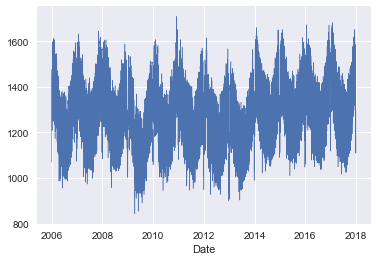

In [66]:
opsd_daily['Consumption'].plot(linewidth=0.5)

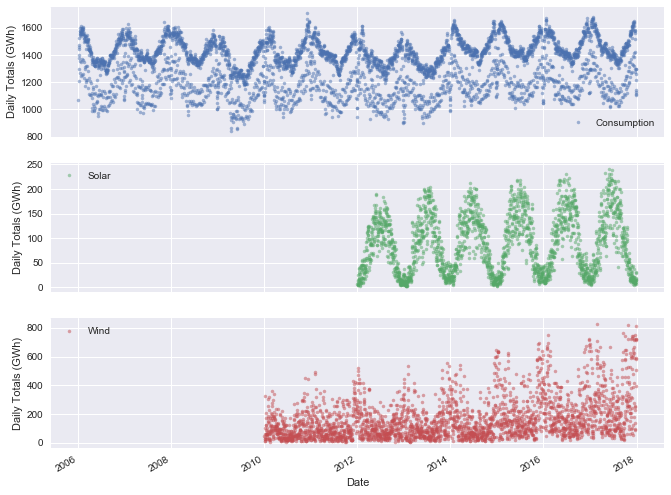

In [68]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

### Explanations on the results

 - Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
 - Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.
 - Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
 - Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.
 - There appears to be a strong increasing trend in wind power production over the years.
 
There is an explicit seasonality for the electricity power usage over seasons and years. When zooming in the time period to one year, you may find there are also seasonality pattern within year.

Text(0,0.5,'Daily Consumption (GWh)')

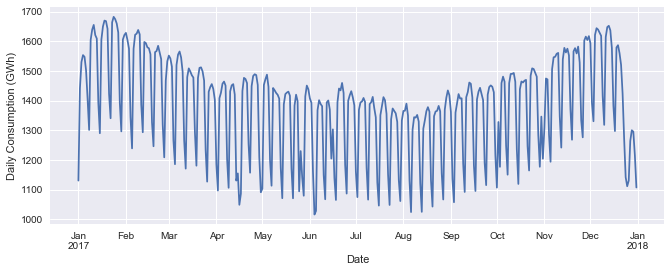

In [71]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,4))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0,0.5,'Daily Consumption (GWh)')

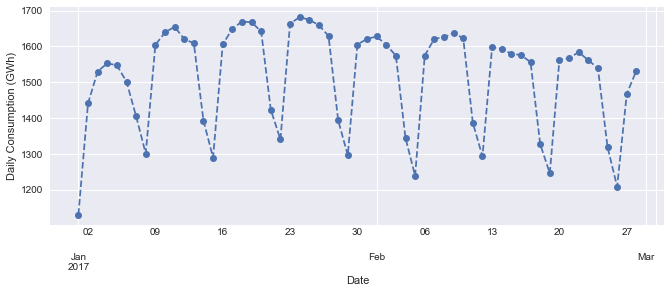

In [74]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='--', figsize=(11,4))
ax.set_ylabel('Daily Consumption (GWh)')

#### Python string-time formatter signs

|Directive|Meaning|
|:---|:---|
|%a|Weekday as locale’s abbreviated name.|
|%A|Weekday as locale’s full name.|
|%w|Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.|
|%d|Day of the month as a zero-padded decimal number.|
|%b|Month as locale’s abbreviated name.|
|%B|Month as locale’s full name.|
|%m|Month as a zero-padded decimal number.|
|%y|Year without century as a zero-padded decimal number.|
|%Y|Year with century as a decimal number.|
|%H|Hour (24-hour clock) as a zero-padded decimal number.|
|%I|Hour (12-hour clock) as a zero-padded decimal number.|
|%p|Locale’s equivalent of either AM or PM.|
|%M|Minute as a zero-padded decimal number.|
|%S|Second as a zero-padded decimal number.|
|%f|Microsecond as a decimal number, zero-padded on the left.|
|%z|UTC offset in the form ±HHMM[SS[.ffffff]] (empty string if the object is naive).|
|%Z|Time zone name (empty string if the object is naive).|
|%j|Day of the year as a zero-padded decimal number.|
|%U|Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0.|
|%W|Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.|
|%c|Locale’s appropriate date and time representation.|
|%x|Locale’s appropriate date representation.|
|%X|Locale’s appropriate time representation.|
|%%|A literal '%' character.|

In [ ]:
# better visualize the seasonality of data with vertical gridline on a weekly time scale
# as seaborn is a blackbox for plotting, so this time we need matplotlib directly
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-', figsize=(11,4))
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))